# Выбор локации для нефтяной скважины
По данным о месторождениях в нескольких локациях методами машинного обучения определен регион, где добыча принесет наибольшую прибыль. Проанализирована возможная прибыль и риски техникой Bootstrap.

## Описание данных
* __id__ — уникальный идентификатор скважины;
* __f0, f1, f2__ — три признака точек;
* __product__ — объём запасов в скважине (тыс. баррелей).

## Оглавление
* [Загрузка и подготовка данных](#1)
* [Обучение и проверка модели](#2)
* [Подготовка к расчёту прибыли](#3)
* [Функция для расчета прибыли](#4)
* [Расчёт прибыли и рисков](#5)
* [Общий вывод](#6)

<a id='1'></a>
## Загрузка и подготовка данных

In [2]:
from numpy.random import RandomState
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_1 = pd.read_csv('/datasets/geo_data_0.csv')
df_2 = pd.read_csv('/datasets/geo_data_1.csv')
df_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [4]:
df_1

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [5]:
df_1.info()
df_2.info()
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8

In [6]:
df_1.duplicated().sum()

0

## Промежуточный вывод

Данные уже предабработаны и готовы к анализу

<a id='2'></a>
## Обучение и проверка модели

Создадим список __data__ со всеми датафреймами чтобы избежать повторяющегося кода. Для каждого региона сделаем разбивку на обучающую и валидационную выборку (соотношение 75:25). Обучим модель линейной регрессии отдельно на каждом регионе и сохраним предсказания запасов нефти с ответами на валидационной выборке. Так же запомнить метрики __RMSE__,  __$R^2$__ для каждого региона, чтобы найти тот, в котором точнее всего работает модель

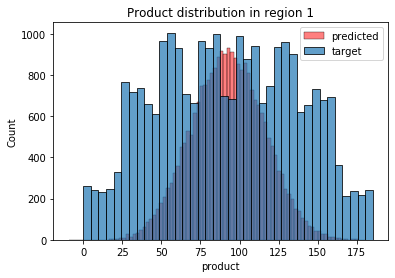

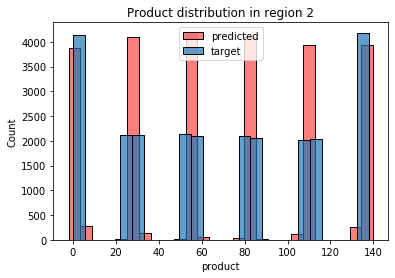

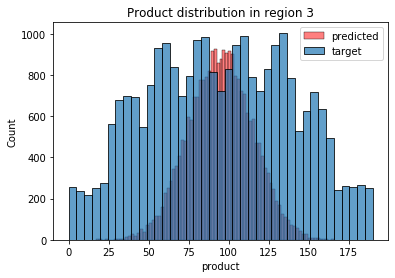

In [7]:
data = [df_1, df_2, df_3]
results = {'region number': [], 'average prediction': [], 'real average': [],  'RMSE': [], '$R^2$': []}
i = 0
predictions = []
answers = []
for df in data:
    results['region number'].append(i + 1)
    i += 1
    
    target = df['product']
    features = df.drop(['id', 'product'] , axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)
    
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    predictions.append(predicted_valid)
    answers.append(target_valid)
    
    results['average prediction'].append(predicted_valid.mean())
    
    results['real average'].append(target.mean())
    
    mse = mean_squared_error(target_valid, predicted_valid)
    results['RMSE'].append(mse ** 0.5)
    
    r2 = r2_score(target_valid, predicted_valid)
    results['$R^2$'].append (r2)

    title = 'Product distribution in region ' + str(i)
    ax = sns.histplot(x=predicted_valid, color = 'r', alpha = 0.5, label = 'predicted')
    ax = sns.histplot(x=target_valid, alpha = 0.7, legend = True, label = 'target')
    ax.set(title = title)
    plt.legend()
    plt.show()

In [8]:
results = pd.DataFrame(results)
results.set_index('region number')

,average prediction,real average,RMSE,$R^2$
region number,,,,
1,92.592568,92.500,37.579422,0.279943
2,68.728547,68.825,0.893099,0.999623
3,94.965046,95.000,40.029709,0.205248


## Промежуточный вывод
Самые богатые нефтью - регионы 1 и 3, самый бедный - второй регион. Тем не менее линейная регрессия работает гораздо лучше во втором регионе - хорошо предсказывает скважины где нет нефти и где ее много. Из-за специфики распределения скважин по прастранству признаков в 1 и 3 регионе линейная регрессия в них работает плохо - не "видит" пустых и богатых нефтью скважин. Метрики $R^2$ и __RMSE__ так же существенно лучше во втором регионе 

<a id='3'></a>
## Подготовка к расчёту прибыли
Напишем функцию для расчета реальной прибыли. На вход она принимает значения запасов нефти для произвольного количества месторождений, возвращает прибыль в млрд. рублей  

In [12]:
BUDGET = 10e9
INCOME_PER_UNIT  = 450e3
N = 200
ESSENTIAL_RESOURCE = BUDGET / (INCOME_PER_UNIT * N)
print('в среднем необходимо более', round(ESSENTIAL_RESOURCE), 'тыс. баррелей на скважину для рентабильности разработки')

в среднем необходимо более 111 тыс. баррелей на скважину для рентабильности разработки


__Промежуточный вывод__

Для окупаемости разработки необходимо в среднем более 111 тыс баррелей на месторождение, это значение превышает средние запасы во всех регионах. В связи с этим принципиально выбрать такой регион, в котором модель линейной регрессии будет выбирать богатые нефтью месторождения и отсеивать скважины с маленькими запасами. Пока наиболее проиритетным в этом смысле является второй регион - модель лучше всего работает именно в нем.

<a id='4'></a>
## Функция для расчета прибыли

In [19]:
def profit(target):
    result = sum(target) - BUDGET/INCOME_PER_UNIT
    return INCOME_PER_UNIT * result / 10e9

<a id='5'></a>
## Расчёт прибыли и рисков 

Техникой __bootstrap__ смоделируем применение наших моделей в условиях реальной задачи. В каждом регионе есть 500 новых месторождений с известными f0, f1, f2, но неизвестными запасами нефти. Поэтому выберем случайно 500 месторождений из валидационной выборки. С помощью модели оставляем 200 лучших из них. Зная реальные запасы нефти считаем прибыль которую бы мы получили в случае их разработки. Для кажого региона повторяем процедуру 1000 раз. Оцениваем доверительные интервалы и риски убытков для кажлго региона

In [20]:
results = pd.DataFrame({'predictions': predictions[0], 'answers': answers[0]})
results

,predictions,answers
71751,95.894952,10.038645
80493,77.572583,114.551489
2655,77.892640,132.603635
53233,90.175134,169.072125
91141,70.510088,122.325180
...,...,...
12581,103.037104,170.116726
18456,85.403255,93.632175
73035,61.509833,127.352259
63834,118.180397,99.782700


In [21]:
state = np.random.RandomState(12345)
values_list = []
risks = []
for i in range(len(answers)):
    values = []
    temp_df = pd.DataFrame({'predictions': predictions[i], 'answers': answers[i]})
    for j in range (1000):
        subsample = temp_df.sample(n = 500, replace=True, random_state=state)
        value = profit(subsample.sort_values(by = 'predictions', ascending = False)[:200]['answers'])
        values.append(value)
    values_list.append(values)
    risks.append(stats.percentileofscore(values, 0))

In [22]:
final_result = pd.DataFrame({'region 1 profit': values_list[0],'region 2 profit': values_list[1] ,'region 3 profit': values_list[2]})
final_result.describe(percentiles = [.025, .975] ).loc[['mean', '2.5%', '97.5%']]

,region 1 profit,region 2 profit,region 3 profit
mean,0.039616,0.046116,0.039295
2.5%,-0.011122,0.007805,-0.011223
97.5%,0.090977,0.086295,0.093456


Text(0, 0.5, 'Profit, billion rubles')

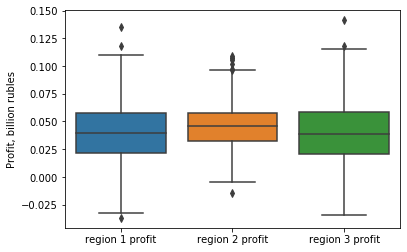

In [23]:
sns.boxplot(data = final_result)
plt.ylabel('Profit, billion rubles')

In [24]:
for i in range(len(data)):
    print('Риск отрицательной прибыли в регоине ' + str(i + 1) + ' -', risks[i], '%')

Риск отрицательной прибыли в регоине 1 - 6.9 %
Риск отрицательной прибыли в регоине 2 - 0.7 %
Риск отрицательной прибыли в регоине 3 - 6.5 %


<a id='6'></a>
## Общий вывод

* Самые богатые нефтью - регионы 1 и 3 (93 и 95 тыс баррелей), самый бедный - 2 регион (69 тыс. баррелей). Тем не менее линейная регрессия работает гораздо лучше во втором регионе - хорошо предсказывает скважины где нет нефти и где ее много.


* Для окупаемости разработки необходимо в среднем более 111 тыс баррелей на месторождение, это значение превышает средние запасы во всех регионах.


* В качестве модели использовалась линейная регрессия по требованию заказчика 


* Линейная регрессия точнее всего сработала во втором регионе. Несмотря на наименьший запас нефти, вероятность получить положительную прибыль - 99.3%. Во втором регионе так же максимальная средняя ожидаемая прибыль - 46 млн. рублей.